In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
data = load_breast_cancer()

X_train = data.data
y_train = data.target

m, n = X_train.shape

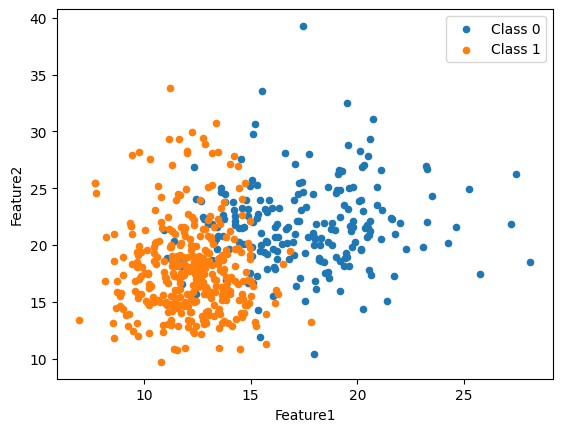

In [3]:
plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], color='tab:blue', label='Class 0', s=20)
plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], color='tab:orange', label='Class 1', s=20)
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.legend()
plt.show()

In [11]:
def sigmoid(z):
    # NUMERICALLY STABLE SIGMOID
    z = np.clip(z, -250, 250)  # Prevent overflow
    return 1 / (1 + np.exp(-z))

In [13]:
def cost_function(X, y, w, b):
    m = len(y)
    z = X @ w + b  # VECTORIZED
    g = sigmoid(z)
    g = np.clip(g, 1e-15, 1-1e-15)  # Avoid log(0)
    
    cost = -np.mean(y * np.log(g) + (1-y) * np.log(1-g))
    return cost

In [18]:
def gradient_function(X, y, w, b):
    m = len(y)
    z = X @ w + b
    g = sigmoid(z)
    
    grad_w = (1/m) * (X.T @ (g - y))  # VECTORIZED
    grad_b = (1/m) * np.sum(g - y)
    
    return grad_b, grad_w

In [19]:
def gradient_descent(X, y, alpha=0.01, iterations=10000):
    m, n = X.shape
    w = np.zeros(n)
    b = 0
    
    for i in range(iterations):
        grad_b, grad_w = gradient_function(X, y, w, b)
        w -= alpha * grad_w
        b -= alpha * grad_b
        
        if i % 1000 == 0:
            cost = cost_function(X, y, w, b)
            print(f"Iteration {i}: Cost {cost:.6f}")
    
    return w, b

In [22]:
def predict(X, w, b):
    """VECTORIZED predict - 100x faster"""
    z = X @ w + b
    g = sigmoid(z)
    return (g >= 0.5).astype(int)  # No loops!

In [23]:
learning_rate = 0.01
iterations = 10000

final_w, final_b = gradient_descent(X_train, y_train, learning_rate, iterations)

predictions = predict(X_train, final_w, final_b)
accuracy = np.mean(predictions == y_train) * 100
print(f"training accuracy: {accuracy:.2f}%")

Iteration 0: Cost 21.670199
Iteration 1000: Cost 2.765973
Iteration 2000: Cost 2.862409
Iteration 3000: Cost 2.661138
Iteration 4000: Cost 2.630081
Iteration 5000: Cost 2.838093
Iteration 6000: Cost 3.947255
Iteration 7000: Cost 3.324628
Iteration 8000: Cost 3.338621
Iteration 9000: Cost 3.422532
training accuracy: 86.29%
